In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, auc, accuracy_score


In [ ]:

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes = True)   
sns.set_palette(palette = 'gist_heat', n_colors = 8)
sns.set(style="whitegrid")

# Regression 

In [4]:
# Load California Housing Dataset (Regression Task)
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

# Display first few rows
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
# Load Heart Disease Dataset (Classification Task)
heart_df = pd.read_csv('heart.csv')

In [6]:
# Display first few rows
print("California Housing Dataset:")
print(housing_df.head())
print("\nHeart Disease Dataset:")
print(heart_df.head())

California Housing Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Heart Disease Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   

In [ ]:
# Splitting datasets for training and testing
X_housing = housing_df.drop(columns=['MedHouseVal'])
y_housing = housing_df['MedHouseVal']
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, y_housing, test_size=0.2, random_state=33)

X_heart = heart_df.drop(columns=['target'])
y_heart = heart_df['target']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_heart, y_heart, test_size=0.2, random_state=33)

In [8]:
# Standardizing the datasets
scaler = StandardScaler()
X_train_h = scaler.fit_transform(X_train_h)
X_test_h = scaler.transform(X_test_h)
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

In [9]:
# Regression Models
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
lin_reg.fit(X_train_h, y_train_h)
dt_reg.fit(X_train_h, y_train_h)

DecisionTreeRegressor()

In [10]:
# Predictions & Evaluation (Regression)
y_pred_lin = lin_reg.predict(X_test_h)
y_pred_dt = dt_reg.predict(X_test_h)

print("\nLinear Regression Performance:")
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_h, y_pred_lin))}, R2 Score: {r2_score(y_test_h, y_pred_lin)}')
print("\nDecision Tree Regression Performance:")
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_h, y_pred_dt))}, R2 Score: {r2_score(y_test_h, y_pred_dt)}')


Linear Regression Performance:
RMSE: 0.7455813830127762, R2 Score: 0.575787706032451

Decision Tree Regression Performance:
RMSE: 0.70552406264012, R2 Score: 0.620145915336736


In [ ]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=33)

# Train the model
mlp_reg.fit(X_train_h, y_train_h)

# Predictions
y_pred_mlp_reg = mlp_reg.predict(X_test_h)

# Evaluation
print("\nMLP Regressor Performance:")
print(f'RMSE: {np.sqrt(mean_squared_error(y_test_h, y_pred_mlp_reg))}, R2 Score: {r2_score(y_test_h, y_pred_mlp_reg)}')


MLP Regressor Performance:
RMSE: 0.5407484225008189, R2 Score: 0.7768567971583532


In [12]:
# Classification Models
log_reg = LogisticRegression()
svm_model = SVC()
log_reg.fit(X_train_c, y_train_c)
svm_model.fit(X_train_c, y_train_c)

SVC()

In [13]:
# Predictions & Evaluation (Classification)
y_pred_log = log_reg.predict(X_test_c)
y_pred_svm = svm_model.predict(X_test_c)

print("\nLogistic Regression Performance:")
print(f'Accuracy: {accuracy_score(y_test_c, y_pred_log)}')
print(confusion_matrix(y_test_c, y_pred_log))
print(classification_report(y_test_c, y_pred_log))

print("\nSVM Performance:")
print(f'Accuracy: {accuracy_score(y_test_c, y_pred_svm)}')
print(confusion_matrix(y_test_c, y_pred_svm))
print(classification_report(y_test_c, y_pred_svm))


Logistic Regression Performance:
Accuracy: 0.7951219512195122
[[73 29]
 [13 90]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


SVM Performance:
Accuracy: 0.8878048780487805
[[85 17]
 [ 6 97]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [ ]:
# Initialize the MLP Classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=33)

# Train the model
mlp_clf.fit(X_train_c, y_train_c)

# Predictions
y_pred_mlp_clf = mlp_clf.predict(X_test_c)

# Evaluation
print("\nMLP Classifier Performance:")
print(f'Accuracy: {accuracy_score(y_test_c, y_pred_mlp_clf)}')
print(confusion_matrix(y_test_c, y_pred_mlp_clf))
print(classification_report(y_test_c, y_pred_mlp_clf))



MLP Classifier Performance:
Accuracy: 0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



c:\Users\W1tcher\anaconda3\envs\myenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


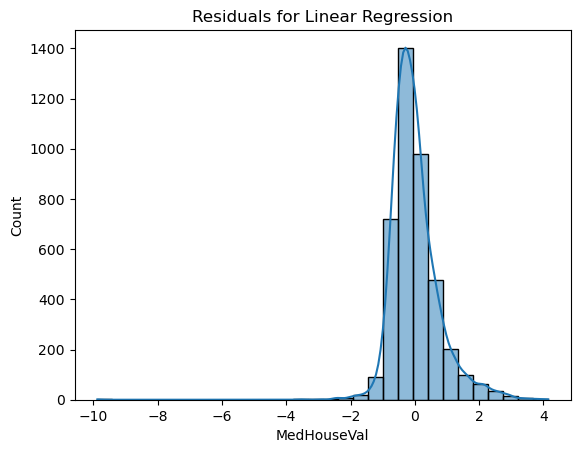

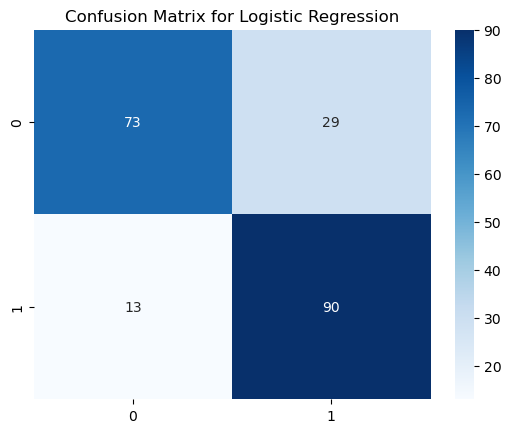

In [15]:
# Visualization
sns.histplot(y_test_h - y_pred_lin, kde=True, bins=30)
plt.title("Residuals for Linear Regression")
plt.show()

sns.heatmap(confusion_matrix(y_test_c, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


# Classification

In [16]:
data = pd.read_csv('winequality-red.csv')

df_main_2 = pd.DataFrame(data)

df_main_2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
df_main_2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
df_main_2.shape

(1599, 12)

In [19]:
df_main_2.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
df_main_2['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [21]:
df_main_2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
# finding unique data

df_main_2.apply(lambda x: len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [23]:
unique = df_main_2.nunique().sort_values()

unique_values = df_main_2.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
alcohol,65,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3..."
chlorides,153,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0..."
citric acid,80,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29..."
density,436,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,..."
fixed acidity,96,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,..."
free sulfur dioxide,60,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0..."
pH,89,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,..."
quality,6,"[5, 6, 7, 4, 8, 3]"
residual sugar,91,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ..."
sulphates,96,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8..."


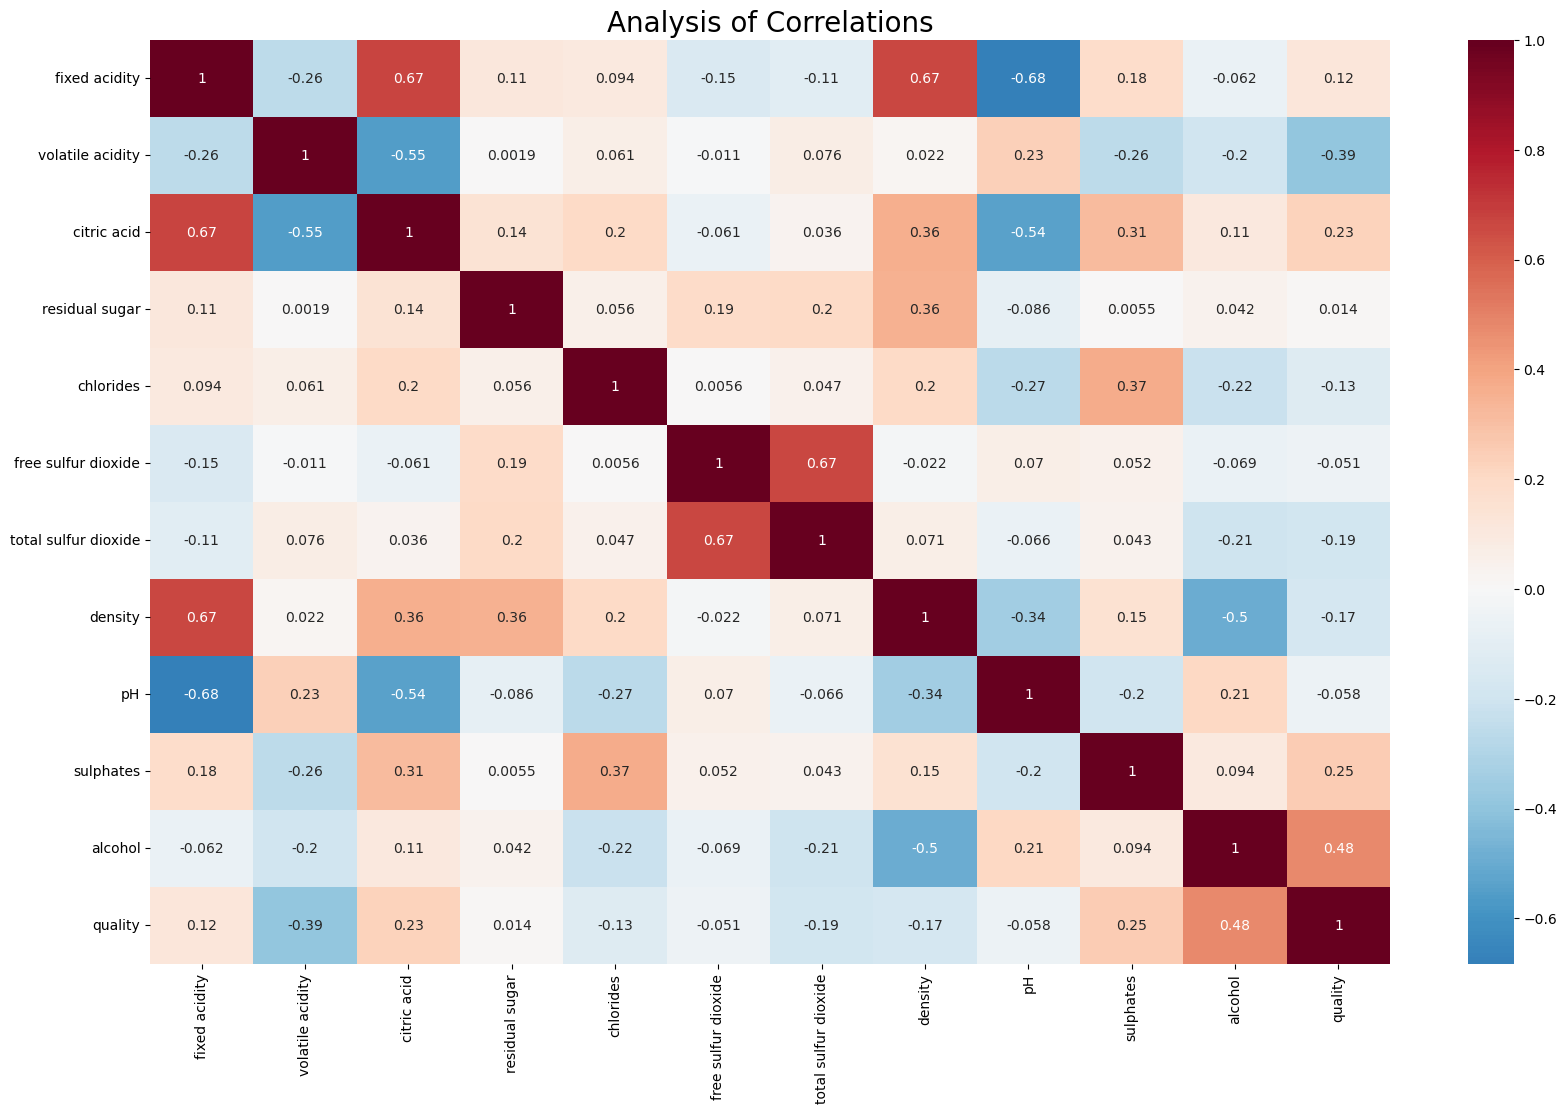

In [24]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_main_2.corr(numeric_only=True), annot=True, cmap="RdBu_r", center=0)
plt.title('Analysis of Correlations', size=20)
plt.show()

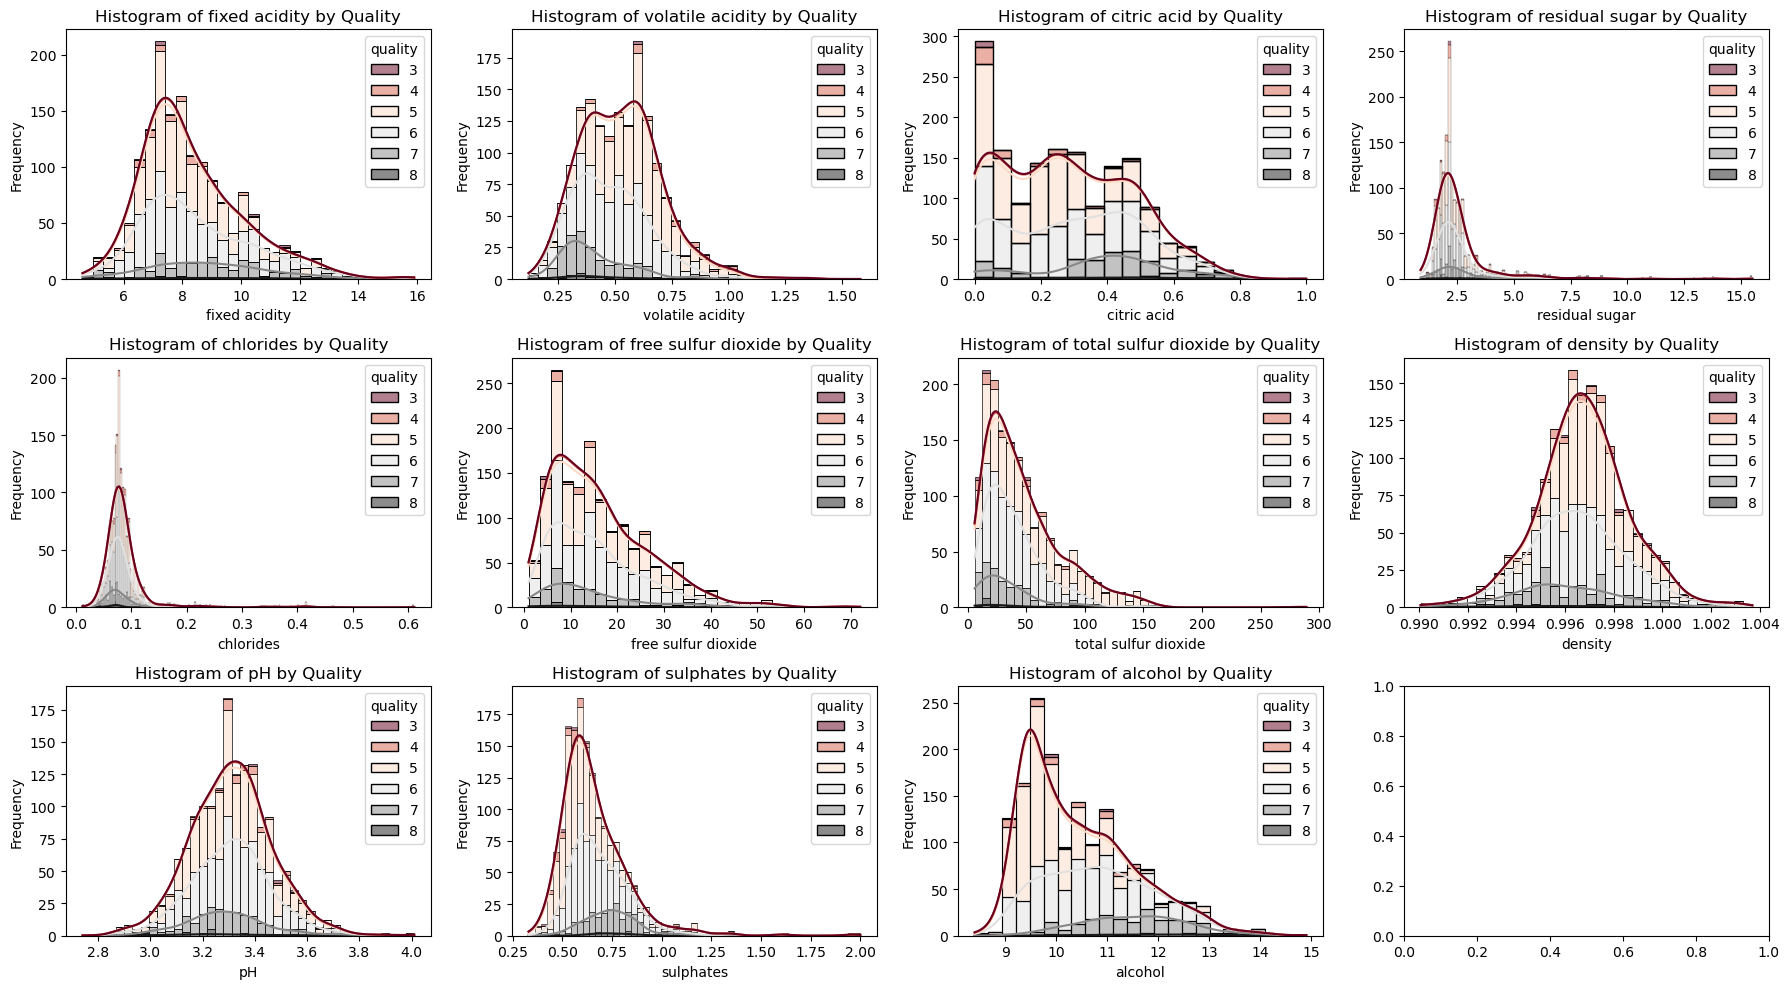

In [25]:
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
ff = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol', 'quality']

for i, column in enumerate(ff[:-1]):  
    ax = axes[i // 4, i % 4]
    sns.histplot(data=df_main_2, x=column, hue='quality', kde=True, ax=ax, palette='RdGy', multiple="stack")
    ax.set_title(f'Histogram of {column} by Quality')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [26]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',}})

In [27]:
data['quality'].value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [28]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Middle
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Middle
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Middle
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Middle


In [31]:
labelencoder_y = LabelEncoder()
data['quality'] = labelencoder_y.fit_transform(data['quality'])

In [32]:
train_columns = data.columns[:-1]
train_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [33]:
X = data.drop('quality', axis = 1).values
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33, stratify = y)

print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test (320,)


In [42]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = y_train.ravel()
y_test = y_test.ravel()

In [35]:
# Initialize lists to store algorithm names, accuracies, and model details

al = []
accuracy = []
models = []



# Function to evaluate the performance of a model
def evaluate_model(algorithm_name, model): 
    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy scores
    acc_model = model.score(X_test, y_test)
    train_acc_model = model.score(X_train, y_train)

    # Store the algorithm name and accuracy
    al.append(algorithm_name)
    accuracy.append(acc_model)
    

    # Print performance metrics
    print(f'For {algorithm_name}\n') 
    print(f'Training Accuracy: {train_acc_model * 100:.4f} %\n')
    print(f'Testing Accuracy: {acc_model * 100:.4f} %\n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.4f} %\n')


    # Create subplots for the confusion matrix and ROC curve
    plt.figure(figsize=(8, 6))

    # Plot the confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                cmap='RdGy', annot_kws={'size': 15}, 
                square=True, fmt='.0f'
                )
    plt.title(f'Confusion Matrix for {algorithm_name}', fontsize=20)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


    
    

    # Extract confusion matrix values (True Positive, False Positive, etc.)

    tp = confusion_matrix(y_test, y_pred)[0, 0]
    fp = confusion_matrix(y_test, y_pred)[0, 1]
    tn = confusion_matrix(y_test, y_pred)[1, 1]
    fn = confusion_matrix(y_test, y_pred)[1, 0]

    # Append the model evaluation results to the models list
    models.append((algorithm_name, tp, fp, tn, fn, train_acc_model, acc_model))

For Logistic Regression

Training Accuracy: 84.7537 %

Testing Accuracy: 82.5000 %

Accuracy Score: 82.5000 %



c:\Users\W1tcher\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


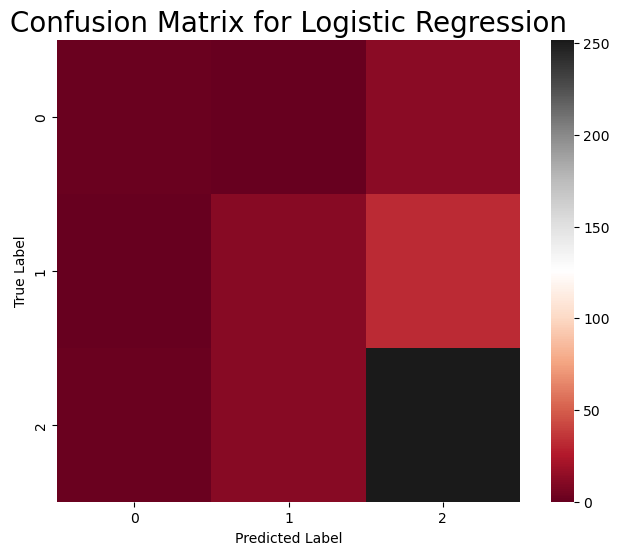

In [36]:
evaluate_model('Logistic Regression',
                                LogisticRegression(C=1.2, 
                                                    fit_intercept=True, 
                                                    max_iter=50, 
                                                    penalty = 'l1', 
                                                    solver='saga'
                                )
                                )

For Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 85.6250 %

Accuracy Score: 85.6250 %



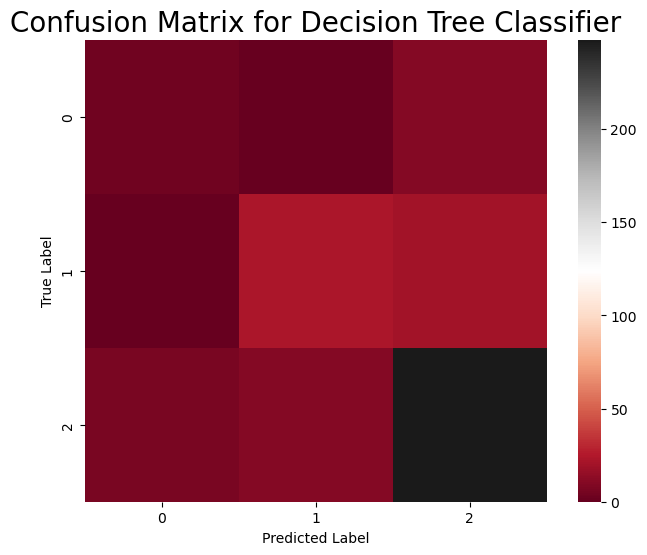

In [37]:
evaluate_model('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy',
                                      splitter = 'best', 
                                      max_features=6, max_depth = 20,
                                      max_leaf_nodes=200, random_state = 33
                                      )
                                      )

For Support Vector Classifier

Training Accuracy: 86.6302 %

Testing Accuracy: 83.4375 %

Accuracy Score: 83.4375 %



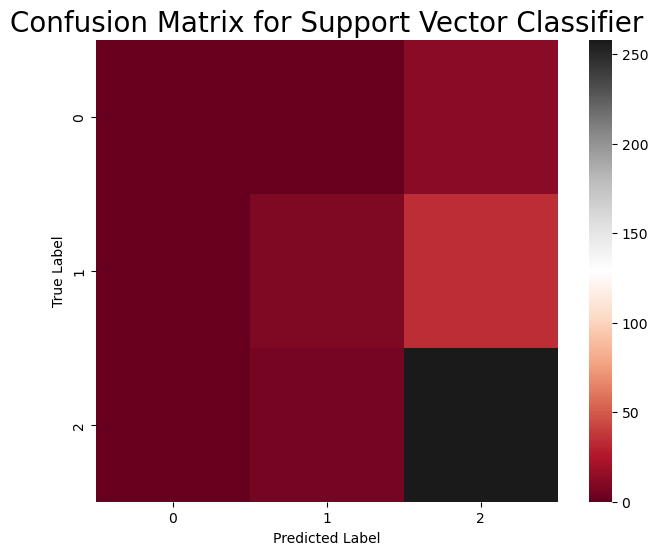

In [38]:
evaluate_model('Support Vector Classifier', SVC( C = 1, 
                                                gamma = 'auto',
                                                kernel = 'rbf', 
                                                random_state = 33, 
                                                probability=True
                                                )
                                                )

For Random Forest Classifer

Training Accuracy: 100.0000 %

Testing Accuracy: 87.8125 %

Accuracy Score: 87.8125 %



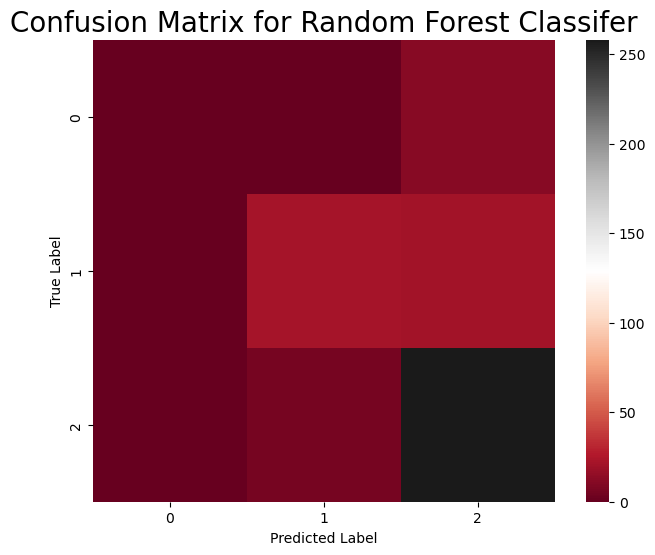

In [39]:
evaluate_model('Random Forest Classifer', 
               RandomForestClassifier(criterion = 'gini', max_depth = 30, 
                                      max_features ='sqrt', n_estimators = 100,
                                      random_state = 33
                                      )
                                      )

For Gradient Boosting Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 85.9375 %

Accuracy Score: 85.9375 %



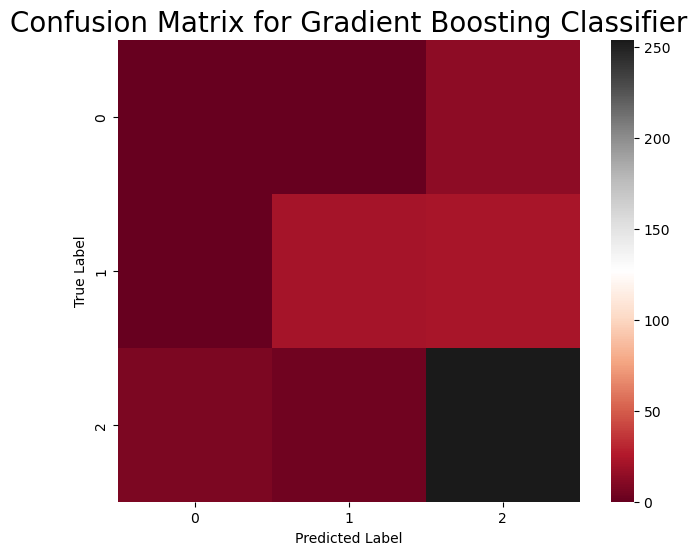

In [40]:
evaluate_model('Gradient Boosting Classifier', 
               GradientBoostingClassifier( loss = 'log_loss',learning_rate = 0.2, max_depth = 5,
                                          min_samples_split = 5, min_samples_leaf = 2,
                                          subsample= 1.0,
                                          n_estimators = 60, random_state = 33
                                          )
                                          )